<p><em style="font-family: 'Arial', sans-serif;">I'm <h2><b>Muhammad Ibrahim Qasmi<b></h2>In this notebook  <span style="font-size: 15px; color: #007BFF;">📊</span> images are classified into five floral classes: <span style="font-size: 15px; color: #FFC0CB;">🌼 chamomile</span>, <span style="font-size: 15px; color: #FF69B4;">🌷 tulip</span>, <span style="font-size: 15px; color: #FF0000;">🌹 rose</span>, <span style="font-size: 15px; color: #FFD700;">🌻 sunflower</span>, and <span style="font-size: 15px; color: #FFC0CB;">🌼 dandelion</span>. Leveraging MobileNet with transfer learning, an impressive <b>94%</b> accuracy was attained. Your <h3>upvotes❤️</h3> are appreciated!<b> </em></p><br>
 <img src="https://i.pinimg.com/564x/20/a3/5f/20a35f9311a47a25fbb64cf5b04e7ede.jpg" alt="Flower Image" width="700" height="300">
 <h2>Contact Me</h2>
<ul>
  <li><a href="https://www.kaggle.com/muhammadibrahimqasmi">Kaggle</a></li>
  <li><a href="https://www.linkedin.com/in/muhammad-ibrahim-qasmi-9876a1297/">LinkedIn</a></li>
  <li><a href="oppoibrahim23@gmail.com">Gmail</a></li>
  <li><a href="https://github.com/muhammadibrahim313">GitHub</a></li>
</ul>





## **Meta Data**
Are you ready to embark on a journey through the mesmerizing realm of flowers? 🌸 Let's dive into a dataset brimming with the vibrant beauty of nature, containing 4242 captivating images of various floral wonders.

### Context 🌿
This delightful collection of images captures the essence of flora from diverse sources such as Flickr, Google Images, and Yandex Images. It serves as a treasure trove for enthusiasts and researchers alike, offering a glimpse into the natural splendor of our world.

### Content 📸
Within this dataset lie 4242 meticulously curated photographs, each a window into the enchanting world of flowers. These images are classified into five distinct classes, each representing a unique botanical marvel:
- **Chamomile**: With its delicate white petals and golden center, the chamomile flower exudes tranquility and calm.
- **Tulip**: A symbol of love and elegance, the tulip boasts a kaleidoscope of colors and graceful curves.
- **Rose**: The epitome of romance and passion, the rose enchants with its velvety petals and intoxicating fragrance.
- **Sunflower**: Radiating warmth and vitality, the sunflower stands tall with its bold, golden hues and cheerful demeanor.
- **Dandelion**: A harbinger of wishes and dreams, the dandelion captivates with its whimsical, ethereal beauty.

### Acknowledgements✨
Gratitude is owed to the diligent efforts of those who compiled this dataset, scraping images from various online sources. Their dedication has provided us with a valuable resource for botanical exploration and research.

## Inspiration 🌟
Amidst this collection of floral delights lies endless potential for discovery and inspiration. From image recognition algorithms to artistic endeavors, the possibilities are as abundant as the petals in a springtime meadow. So, what kind of flower catches your eye? Dive in, explore, and let the beauty of nature inspire your imagination! 🌷✨


# **Table of Contents**

**Step 1:** Importing Libraries 📝  
[Importing Libraries](#step-1-importing-libraries)

**Step 2:** Loading Dataset 📂  
[Loading Dataset](#step-2-loading-dataset)

**Step 3:** Data Preparation 🛠️  
[Data Preparation](#step-3-data-preparation)

**Step 4:** Creating Model 🧠  
[Creating Model](#step-4-creating-model)

**Step 5:** Prediction 🎯  
[Prediction](#step-5-prediction)

**Step 6:** Conclusion 📝  
[Conclusion](#step-6-conclusion)


# *Step 1: Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm

import tensorflow as tf 

import os
import shutil
from tqdm import tqdm
from random import shuffle

import cv2
from glob import glob

from tensorflow.keras import backend as K
import random
import albumentations as A
from sklearn.model_selection import train_test_split, StratifiedKFold

from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications.efficientnet import *
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

2024-02-15 11:42:04.229562: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 11:42:04.229695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 11:42:04.419386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# *Step 2: Loading Dataset*

In [2]:
image_dir = Path('/kaggle/input/flowers-recognition/flowers')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

### 2.1 *Viewing Dataset*

In [3]:
#Viewing first 5 image
image_df.head()

,Filepath,Label
0,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
1,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
2,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
3,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
4,/kaggle/input/flowers-recognition/flowers/dand...,dandelion


In [4]:
#Viewing last 5 image
image_df.tail()

,Filepath,Label
4312,/kaggle/input/flowers-recognition/flowers/rose...,rose
4313,/kaggle/input/flowers-recognition/flowers/rose...,rose
4314,/kaggle/input/flowers-recognition/flowers/rose...,rose
4315,/kaggle/input/flowers-recognition/flowers/rose...,rose
4316,/kaggle/input/flowers-recognition/flowers/rose...,rose


In [5]:
# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)

,Filepath,Label
0,/kaggle/input/flowers-recognition/flowers/rose...,rose
1,/kaggle/input/flowers-recognition/flowers/sunf...,sunflower
2,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
3,/kaggle/input/flowers-recognition/flowers/tuli...,tulip
4,/kaggle/input/flowers-recognition/flowers/sunf...,sunflower


### 2.2 *Shape of Dataset*

In [6]:
image_df.shape

(4317, 2)

### 2.3 *Displaying Dataset*

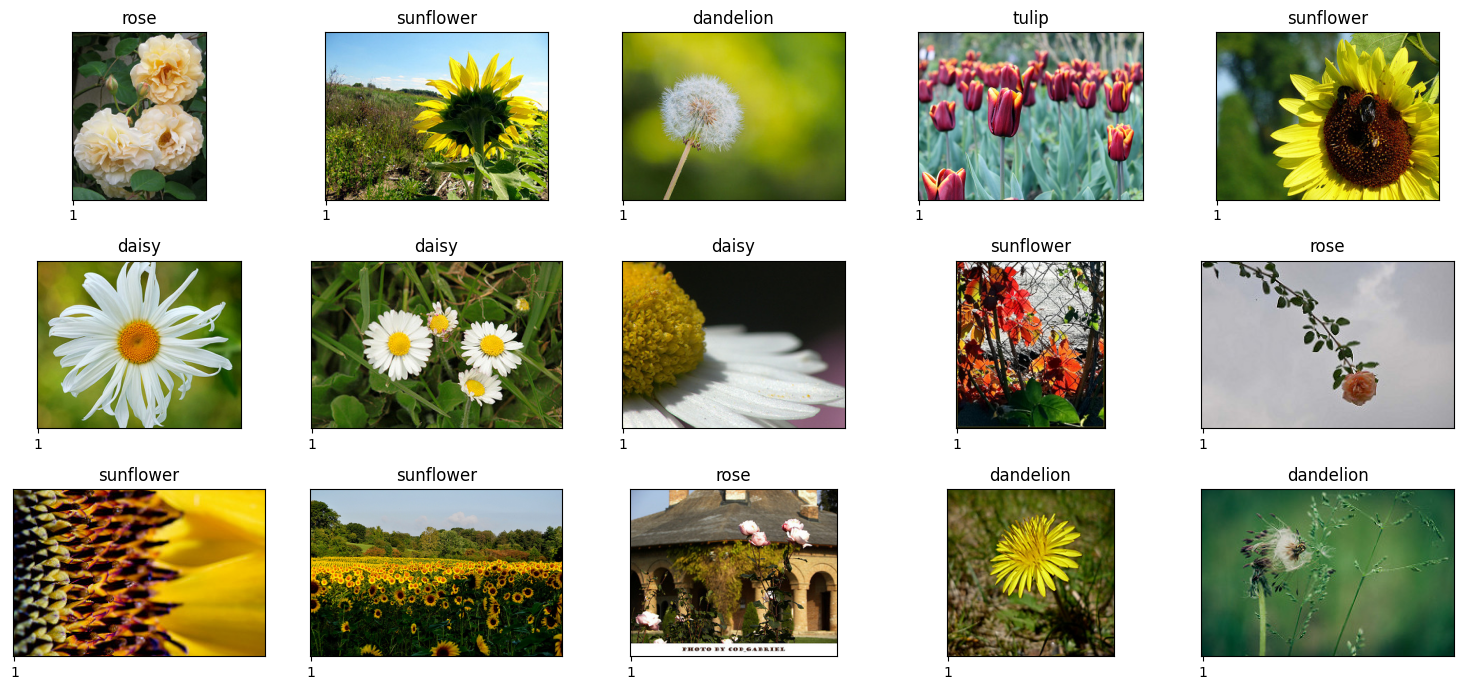

In [7]:
# Display 20 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [1], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

# *Step 3: Data Preparation*

### 3.1 *Splitting Dataset*

In [8]:
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=True, random_state=1)

### 3.2 *Train Data Shape*

In [9]:
train_df.shape

(3885, 2)

### 3.3 **MobilenetV2**

**This snippet prepares tools for loading images, preprocessing them in a way that's optimized for training with the MobileNet V2 model, and divides the training images into two parts: 80% for training and 20% for validation. The testing images are also preprocessed using the same method but are not split.**

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

### 3.4 *Train Data head and tail*

In [11]:
train_df.head()

,Filepath,Label
3808,/kaggle/input/flowers-recognition/flowers/dais...,daisy
1858,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
2275,/kaggle/input/flowers-recognition/flowers/dand...,dandelion
1909,/kaggle/input/flowers-recognition/flowers/tuli...,tulip
1078,/kaggle/input/flowers-recognition/flowers/tuli...,tulip


In [12]:
train_df.tail()

,Filepath,Label
2895,/kaggle/input/flowers-recognition/flowers/sunf...,sunflower
2763,/kaggle/input/flowers-recognition/flowers/sunf...,sunflower
905,/kaggle/input/flowers-recognition/flowers/tuli...,tulip
3980,/kaggle/input/flowers-recognition/flowers/rose...,rose
235,/kaggle/input/flowers-recognition/flowers/dais...,daisy


### 3.5 *Train,validation and test Data Shape*

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3108 validated image filenames belonging to 5 classes.
Found 777 validated image filenames belonging to 5 classes.
Found 432 validated image filenames belonging to 5 classes.


**There are 3108 training images and 777 and  432 validated are  images**

# *Step 4: Creating Model*

In [14]:
def create_model(input_shape=(224, 224, 3)):
    
    inputs = Input(input_shape)
    base_model = EfficientNetB1(input_shape=input_shape, include_top=False, classes=5)
    
    x = base_model(inputs)
    
    x = GlobalAveragePooling2D()(x)
#     x = Dropout(0.1)(x)
    
    x = Dense(56, activation='relu')(x)
    x = Dropout(0.1)(x)
    
    outputs = Dense(5, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    
    return model
K.clear_session()

model = create_model((224, 224, 3))
# model = load_model('models/checkpoint/EfficientNetB0.h5')

metrics = [
    'accuracy',
    'AUC'
]

27018416/27018416 [==============================] - 0s 0us/step


### 4.1 *Compile Model*

In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=metrics)

###  4.2 *Callbacks*

In [16]:
checkpoint_path = 'models/EfficientNetB1/model_224.h5'

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

### 4.3 *Fit Model*

In [17]:
%%time
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30


2024-02-15 11:42:58.506724: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707997385.627849      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.7976 - auc: 0.9265
Epoch 1: val_loss improved from inf to 4.35847, saving model to models/EfficientNetB1/model_224.h5
98/98 [==============================] - 102s 461ms/step - loss: 0.5902 - accuracy: 0.7976 - auc: 0.9265 - val_loss: 4.3585 - val_accuracy: 0.2304 - val_auc: 0.5327 - lr: 0.0010
Epoch 2/30
98/98 [==============================] - ETA: 0s - loss: 0.3166 - accuracy: 0.8945 - auc: 0.9709
Epoch 2: val_loss improved from 4.35847 to 1.93637, saving model to models/EfficientNetB1/model_224.h5
98/98 [==============================] - 37s 381ms/step - loss: 0.3166 - accuracy: 0.8945 - auc: 0.9709 - val_loss: 1.9364 - val_accuracy: 0.2214 - val_auc: 0.5618 - lr: 0.0010
Epoch 3/30
98/98 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9292 - auc: 0.9813
Epoch 3: val_loss did not improve from 1.93637
98/98 [==============================] - 37s 375ms/step - loss: 0.2101 - accuracy: 

### 4.4 *Plotting*

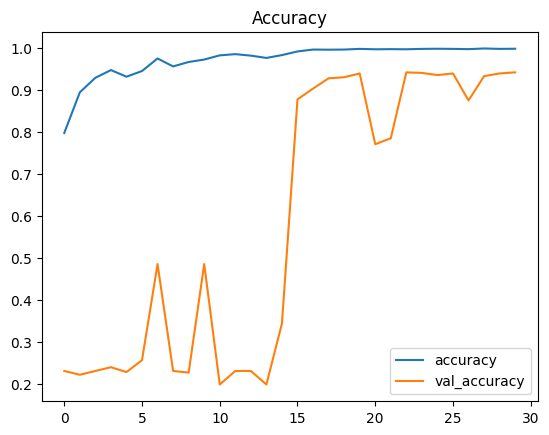

In [18]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()


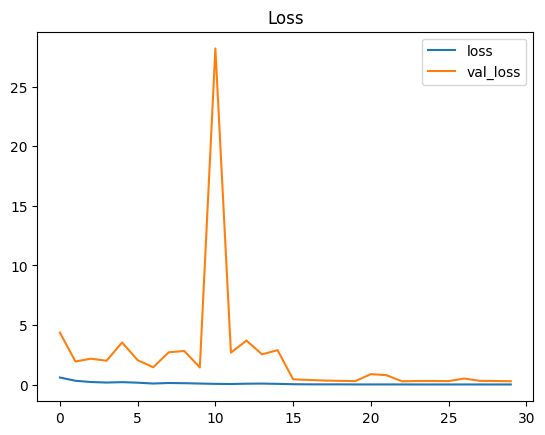

In [19]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### 4.5 *Evaluate Model*

In [20]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.28290
Test Accuracy: 92.82%


## **BOOM!! Test accuracy ~93% 💥💯**

# *Step 5: Prediction*

In [21]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

14/14 [==============================] - 3s 95ms/step
The first 5 predictions: ['rose', 'tulip', 'tulip', 'tulip', 'dandelion']


### 5.1 *Classification Report*

In [22]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       daisy       0.92      0.93      0.92        84
   dandelion       0.94      0.90      0.92       105
        rose       0.90      0.93      0.91        86
   sunflower       0.95      0.97      0.96        65
       tulip       0.93      0.93      0.93        92

    accuracy                           0.93       432
   macro avg       0.93      0.93      0.93       432
weighted avg       0.93      0.93      0.93       432



### 5.2 *Confusion Matrix*

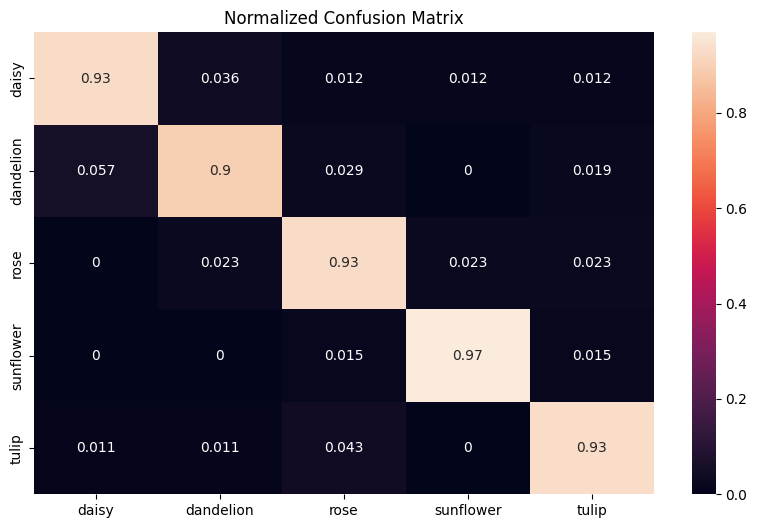

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

### 5.3 *Visualize Predictions*

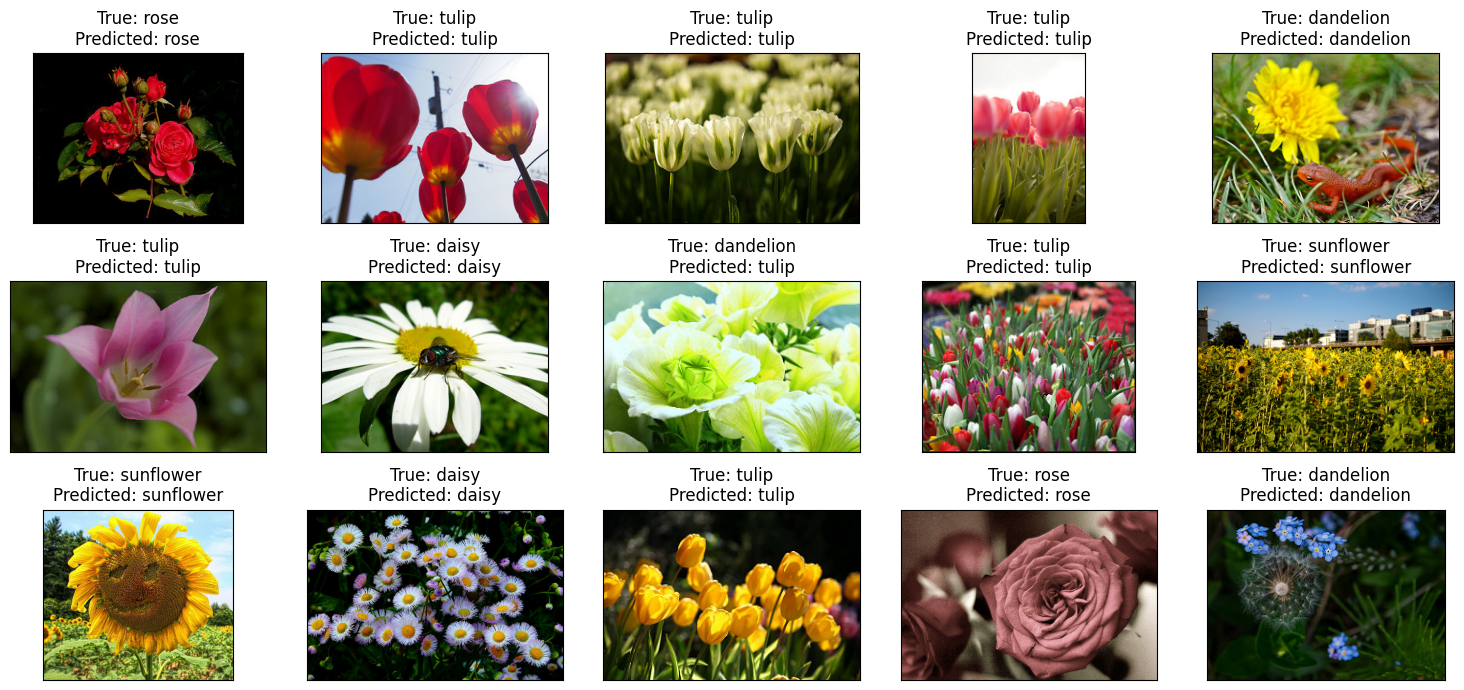

In [24]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## **Awesome!! You can see RESULT mate. 🎉✨** 

# *Step 6: Conclusion*


## **Thank you for reading! If you find this notebook helpful, please do upvote and follow! 🌟 And if you want to use any part of my notebook, you're welcome to! 📝**


----
